<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

ModuleNotFoundError: ignored

In [2]:
print("{}".format(boston.keys()))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print("{}".format(boston['data'].shape))

(506, 13)


In [8]:
pip install mglearn

     |████████████████████████████████| 540 kB 4.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=a05843403ef52173ce74103c36913152da73beff1d45d011a5ffa91b6cd82037
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [10]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shpae: {}".format(X.shape))

X.shpae: (506, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


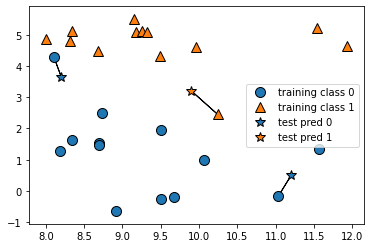

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [59]:
#forge 데이터셋은 26개의 샘플과 2개의 특성을 갖고 있다.
#q는 데이터셋, w는 정답 label
q,w = mglearn.datasets.make_forge()
print(type(w))
print(w.shape)

<class 'numpy.ndarray'>
(26,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [20]:
#훈련 세트를 사용하여 분류 모델을 학습시킨다.
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
#테스트 데이터에 대해 predict 메서드를 호출해서 예측한다.
#테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾는다.
print("테스트 세트 예측 {}".format(clf.predict(X_test)))

테스트 세트 예측 [1 0 1 0 1 0 0]


In [26]:
import numpy as np
y_pred = clf.predict(X_test)
print(y_pred)
print("테스트 세트 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test,y_test)))


[1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86
테스트 세트 정확도: 0.86


In [ ]:
!pip install mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_te

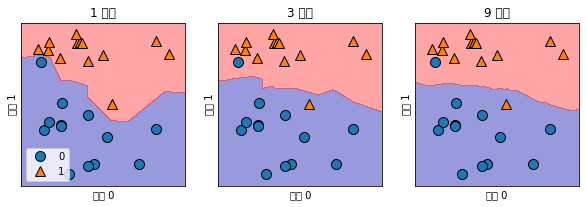

In [15]:
# fit 메서드는 self 객체를 반환한다. 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있다.
#2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy 평면에 그려볼 수 있다. 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(decision boundary)를 볼 수 있다.
#이웃을 적게 사용하면 모델의 복잡도가 높아지고(overfitting), 이웃을 많이 사용하면 복잡도는 낮아진다.(underfitting)
#훈련 데이터 전체 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃(모든 훈련 데이터)을 가지게 되므로 테스트 포인트에 대한 예측은 모두 같은 값이 된다.
#즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 된다.
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn
X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,3, figsize =(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend(loc=3)